In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import mean

In [13]:
xs = np.array([1,2,3,4,5,6],dtype=np.float64)
ys = np.array([5,4,6,5,6,7],dtype=np.float64)

In [14]:
def best_fit_slope(xs,ys):
    m=((mean(xs) * mean(ys))-mean(xs*ys)) / (mean(xs)*mean(xs)-mean(xs*xs))
    b=mean(ys) - m*mean(xs)
    return m,b


<IPython.core.display.Javascript object>


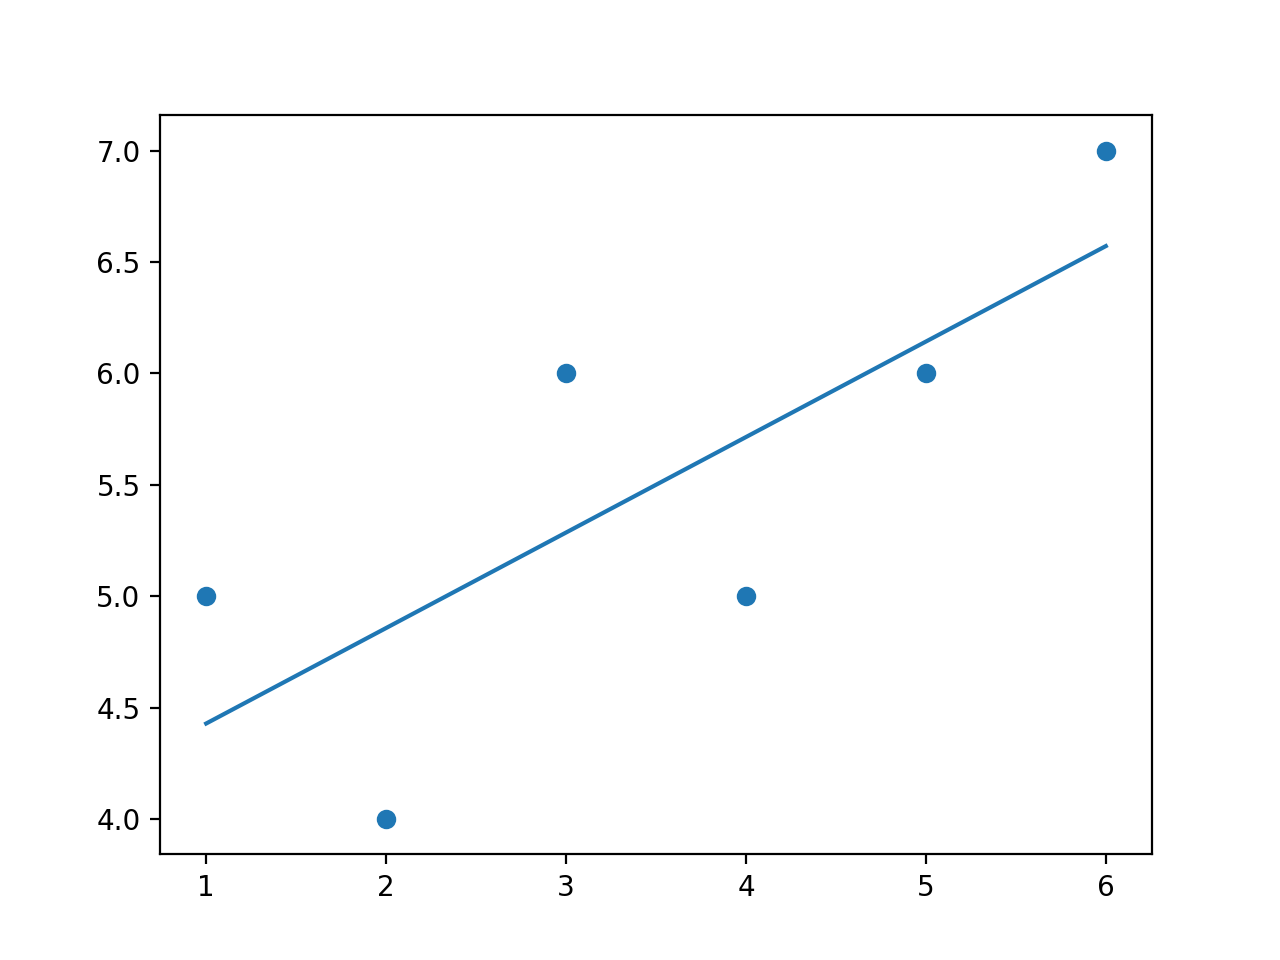

In [21]:
m,b=best_fit_slope(xs,ys)
regression_line = [(m*x)+b for x in xs]
#%matplotlib notebook
plt.scatter(xs,ys)
plt.plot(xs, regression_line)
plt.show()

In [22]:
import tensorflow as tf

tf.__version__

'1.10.0'

In [23]:
mnist = tf.keras.datasets.mnist # 28*28 images of hand-written digits 0-9
(x_train, y_train), (x_test, y_test)=mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #rectified linear
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) 
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 11s 179us/step - loss: 0.2621 - acc: 0.9229
Epoch 2/3
60000/60000 [==============================] - 9s 152us/step - loss: 0.1050 - acc: 0.9677 0s - loss: 0.10
Epoch 3/3
60000/60000 [==============================] - 9s 151us/step - loss: 0.0706 - acc: 0.9772


In [25]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [26]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

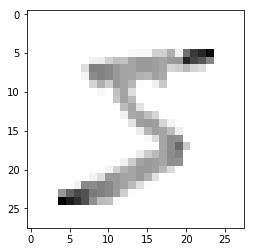

In [17]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [18]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 68us/step
0.0942969269702211 0.9718


In [19]:
#`save_model` requires h5py.
model.save('epic_num_reader.model')

In [22]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [24]:
predictions = new_model.predict([x_test])
print(predictions)

[[1.74079762e-09 2.07975877e-08 4.31184958e-07 ... 9.99975204e-01
  2.86319128e-08 6.02399950e-06]
 [1.85870501e-08 1.29140227e-03 9.98669147e-01 ... 1.25555353e-08
  1.90199023e-06 2.66808287e-09]
 [1.14917796e-07 9.99871254e-01 1.96764381e-06 ... 4.47591592e-05
  1.37110101e-05 1.42204899e-05]
 ...
 [4.41521841e-09 2.42260484e-07 6.43904983e-08 ... 6.74421290e-06
  8.39988672e-07 1.08997374e-05]
 [3.70457585e-08 3.24668221e-08 5.11353582e-09 ... 6.98434462e-07
  2.44766969e-04 5.91895812e-08]
 [1.60460913e-05 2.87820745e-09 2.99740691e-07 ... 2.18996613e-10
  1.76854442e-07 1.78256236e-08]]


In [25]:
import numpy as np

print(np.argmax(predictions[0]))

7


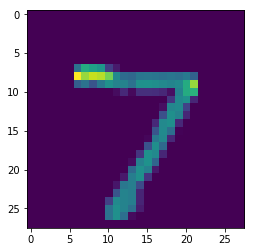

In [27]:
plt.imshow(x_test[0])

In [31]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)